<div style="display: flex; justify-content: center; align-items: center; overflow: hidden; height: 300px;">
 <img src="https://applescoop.org/image/wallpapers/mac/los-angeles-la-southern-california-socal-sunrise-sunset-pink-orange-red-sky-palm-trees-28-10-2024-1730155055-hd-wallpaper.jpg" alt="California Test Image" style="height: 100%; width: 100%; object-fit: cover;">
</div>

<div style="display: flex; align-items: center; background-color: #e1502b; color: white; padding: 15px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192; height: 50px;">
    <h1 style="margin: 0;">California Housing</h1>
</div>


Loading Libraries

In [1]:
from sklearn.preprocessing import StandardScaler

Loading Python Functions

In [2]:
import sys

python_functions_path = 'California_housing'
sys.path.append(python_functions_path)

from python_functions import *

<div style="background-color: #f6a192; color: white; padding: 20px 20px 0px 20px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192;">
    <h2>1 | Cleaning Data</h2>
    <h5>- Checking for Nan, Duplicates, and Data Types</h5>
</div>

Loading data

In [3]:
raw_df = pd.read_csv('/home/newmant1/luna/Kaggle/California_Housing/housing.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
raw_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 207 rows containing missing values. As this is a relatively small number of rows, we will used predict them using KNN imputer.


In [6]:
df = impute_df_with_knn(raw_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Check for duplicate columns

In [7]:
duplicate_columns = df.columns[df.columns.duplicated()]         # saving the duplicate columns
print("Number of duplicated columns:", len(duplicate_columns))

Number of duplicated columns: 0


<div style="background-color: #f6a192; color: white; padding: 20px 20px 0px 20px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192;">
    <h2>2 | Exploratory Data Analysis</h2>
    <h5>- Variable Distributions and Correlations</h5>
</div>

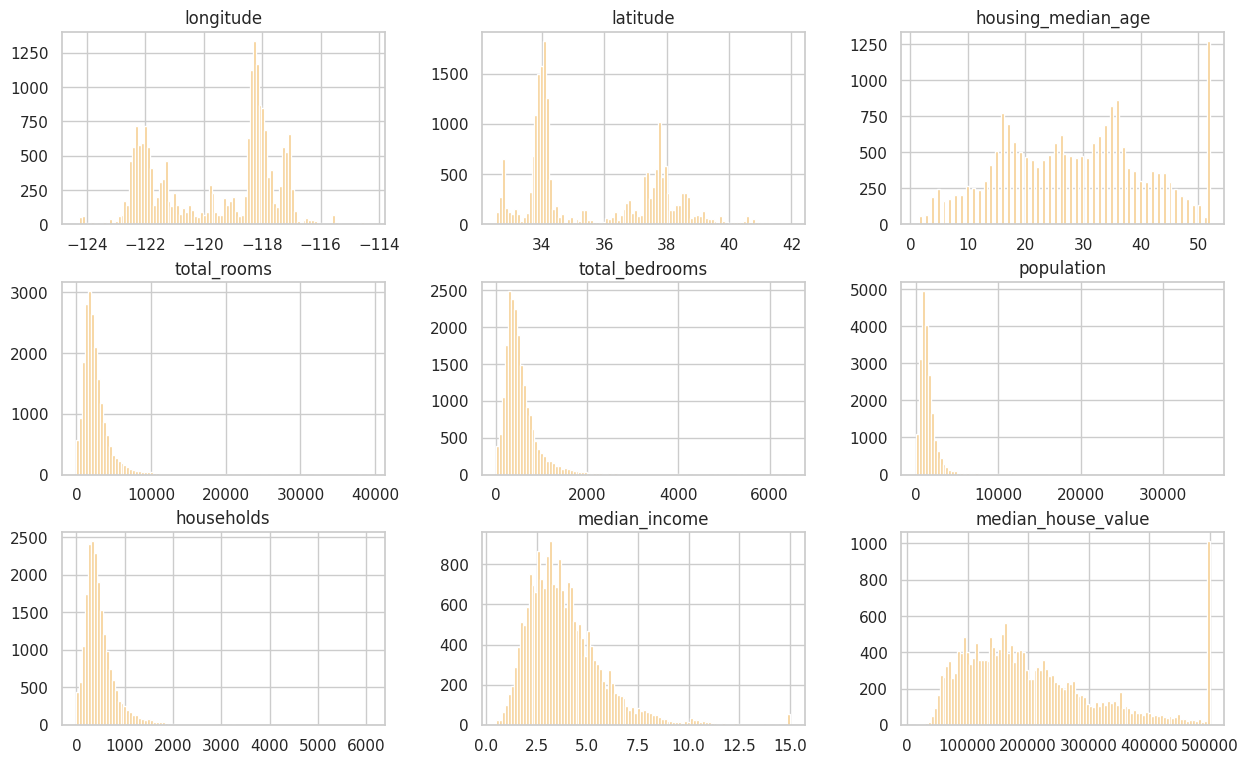

In [8]:
df.hist(bins=100, figsize=(15,9),color="#f6cf92")
plt.show()

 - Outliers are visible in "median_house_value" and "housing_median_age".
 - All remaining features (except for "longitude" and "latitude") are right skewed. This can be handled by taking the log of the features.

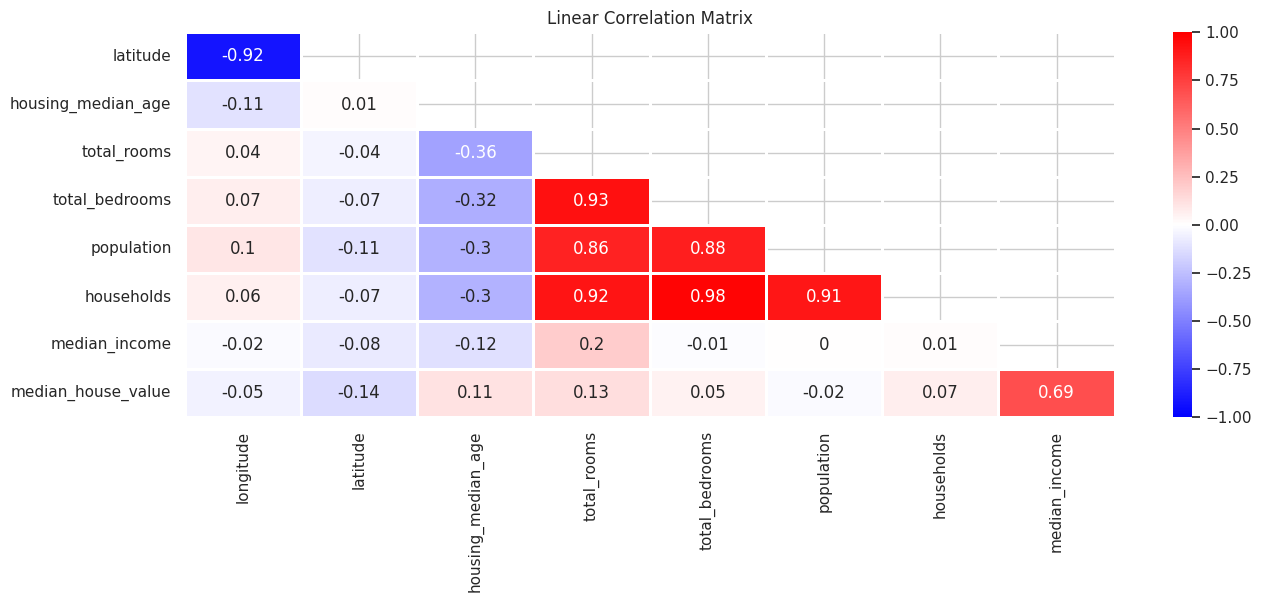

In [9]:
correlation_matrix_plot(df)

- "median_house_value" is positively strongly correlated with "median_income", which is expected. This makes it an important variable for prediction.
- It is also weakly correlated to "latitude", "housing_median_age", and "total_rooms".


In [10]:
pair_plots(df)

- "median_house_value" has a strong positive correlation with "median_income".
- "median_house_value" has complex or non-linear relationships with other variables.
- "median_house_value" has bi-modal relationship with both "latitude" and "longitude".
    - This suggests that a combination of these two variables may be useful for prediction.
    - We will now explore this further using visual representations of california's map.


/home/newmant1/Desktop/Kaggle/California_housing/California_housing/python_functions.py:62: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cali = cali.assign(area=cali.geometry.area)


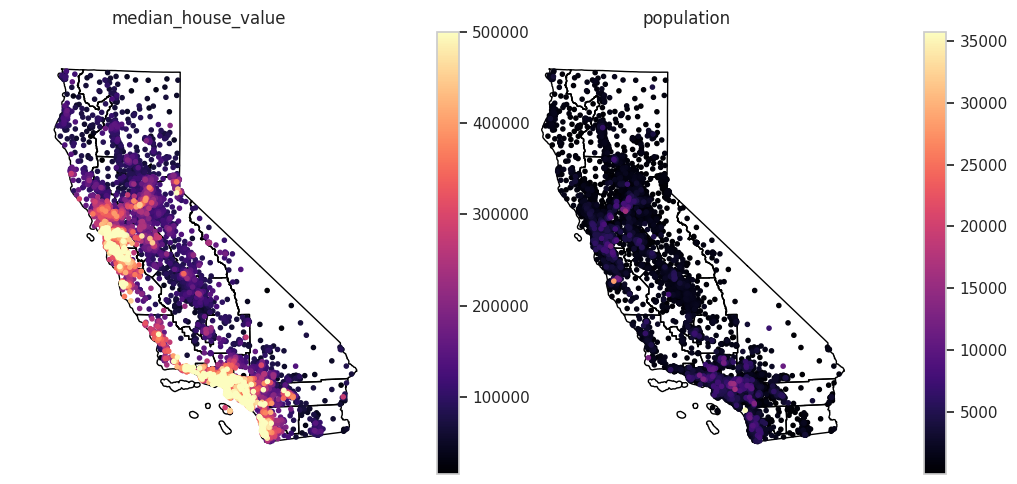

In [ ]:
california_plot(df,['median_house_value', 'population'])

- We can see a clear correlation between "latitude" and "longitude" with "median_house_value". This suggests that these two variables can be used to predict "median_house_value".

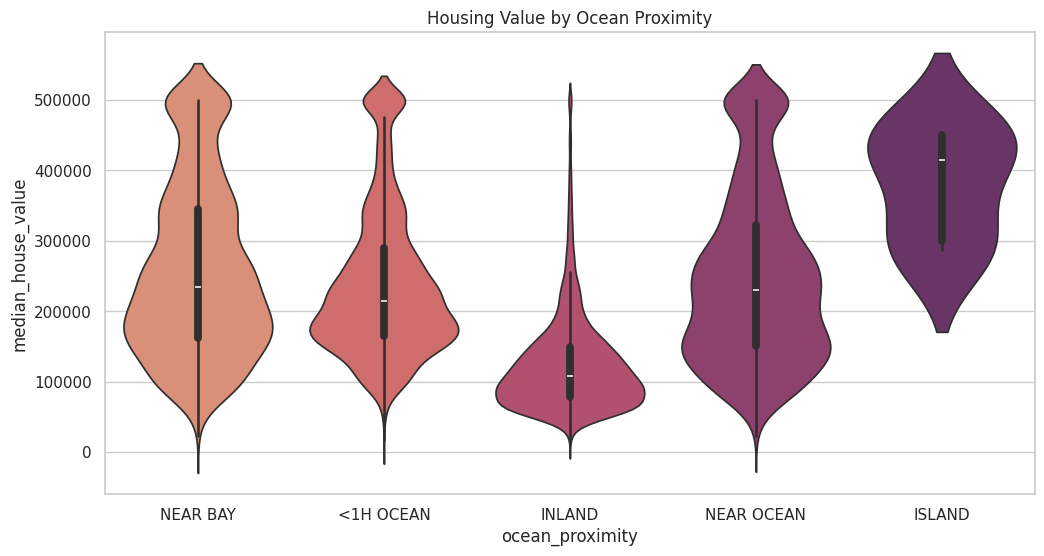

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', hue='ocean_proximity', data=df, palette='flare', legend=False)
plt.title('Housing Value by Ocean Proximity')
plt.show()

- All categories show signs of right skwedness except for "ISLAND" indicating that median house value cannot be explained by "ocean_proximity" alone.
- The "median_house_value" outliers seen in the histograms is reflected here by a modality around $500,000 in all categories. 
- The mean "median_house_value" is similar for "NEAR BAY", "<1 OCEAN" and "NEAR OCEAN".
- The highest for the "ISLAND" category and lowest for the "INLAND" category.

<div style="background-color: #f6a192; color: white; padding: 20px 20px 0px 20px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192;">
    <h2>3 | Removing Outliers</h2>
</div>

From the histogram in the EDA above, there appears to be a clear outlier at the highest "median_house_value".

In [ ]:
df["median_house_value"].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
352500.0      1
465000.0      1
457500.0      1
261200.0      1
307900.0      1
Name: count, Length: 3842, dtype: int64

It seems from that all "median_house_value" above $500,000 have been set to $500,001. We will remove these outliers from the dataset.

In [ ]:
max_median_house_value = df['median_house_value'].max() # get the maximum value
df = df[df['median_house_value'] != max_median_house_value] 

This is also observed for the "housing_median_age" feature. Where all values above 52 were set to 52. We will remove these outliers as well.

In [ ]:
max_housing_median_age = df['housing_median_age'].max() # get the maximum value
df = df[df['housing_median_age'] != max_housing_median_age] 

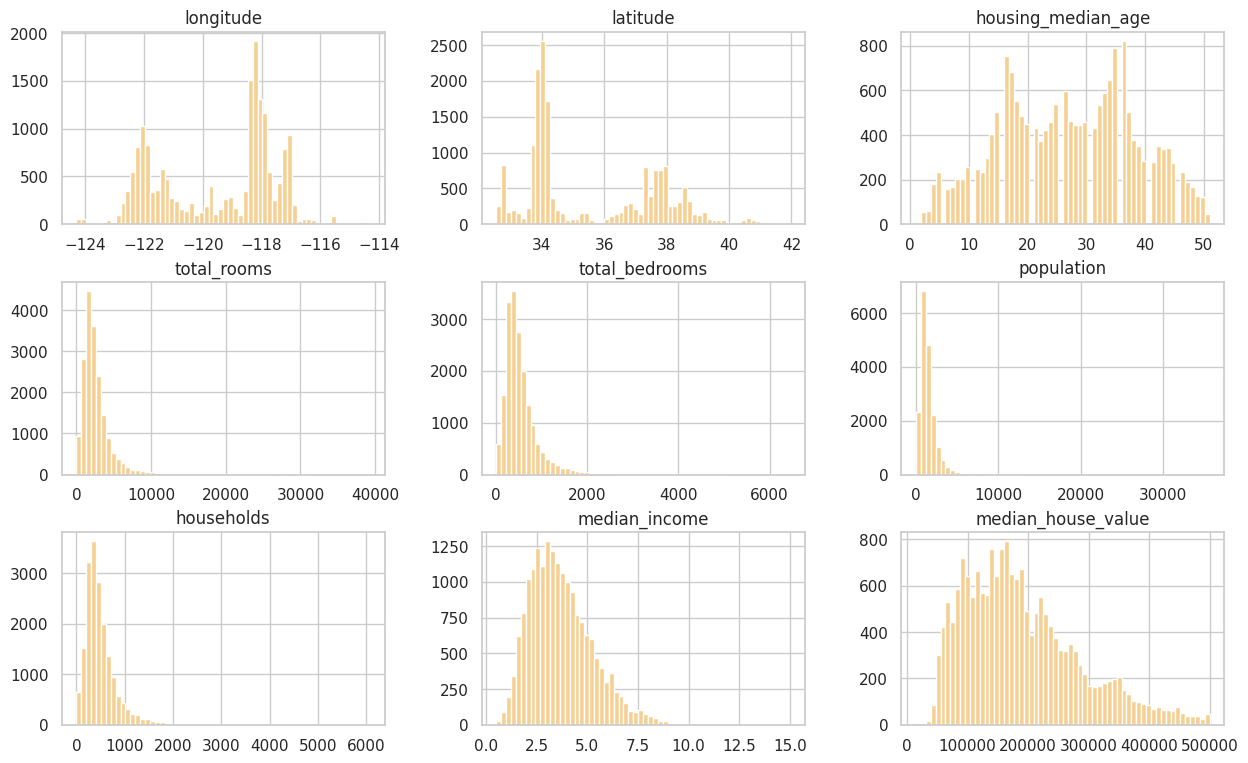

In [ ]:
df.hist(bins=60, figsize=(15,9),color="#f6cf92")
plt.show()

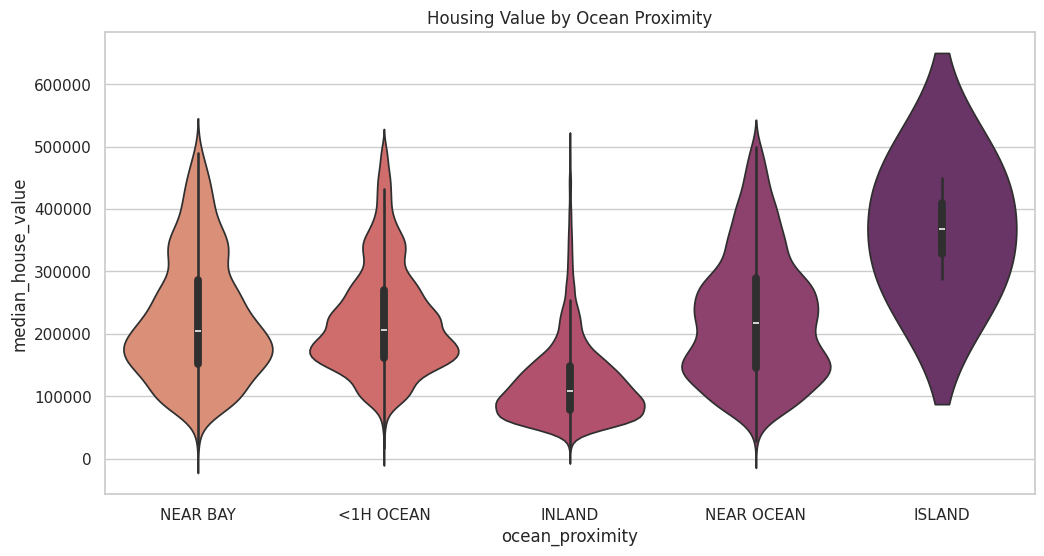

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', hue='ocean_proximity', data=df, palette='flare', legend=False)
plt.title('Housing Value by Ocean Proximity')
plt.show()

In [ ]:
df[df["ocean_proximity"] == "ISLAND"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


Note we only have 2 observations for "ISLAND" category.

<div style="background-color: #f6a192; color: white; padding: 20px 20px 0px 20px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192;">
    <h2>4 | Feature Engineering</h2>
    <h5>- Variable Standardisation, Transformation and Encoding</h5>
</div>

Saving a copy of original data

In [ ]:
original_df = df.copy()

Creating new features for "latitude" and "longitude" to capture the relationship between these two variables and "median_house_value".

In [ ]:
df["lat_long"] = df["latitude"] + df["longitude"]

In [ ]:
print(f"'lat_long' and 'median_house_value' correlation: {np.corrcoef(df['lat_long'], df['median_house_value'])[0][1]}")

'lat_long' and 'median_house_value' correlation: -0.49958679037953085


- The new feature "lat_long" shows a moderate negative relationship with "median_house_value". This will help the model to predict "median_house_value" more accurately.

Log transformation: corrects for right skewness in the data.

In [ ]:
column_to_transform = ['total_rooms', 'total_bedrooms', 'households', 'population'] # right skewed variables
for column in column_to_transform:
    df[f'log_{column}'] = np.log1p(df[column])          # log transformation              
    df = df.drop(columns=column)                        # drop the original column

In [ ]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,lat_long,log_total_rooms,log_total_bedrooms,log_households,log_population
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,-84.35,6.781058,4.867534,4.844187,5.777652
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,-84.36,8.867850,7.009409,7.037906,7.784057
8,-122.26,37.84,42.0,2.0804,226700.0,NEAR BAY,-84.42,7.846199,6.501290,6.390241,7.095893
15,-122.26,37.85,50.0,2.1250,140000.0,NEAR BAY,-84.41,7.021976,5.648974,5.579730,6.548219
18,-122.26,37.84,50.0,1.9911,158700.0,NEAR BAY,-84.42,7.714231,6.122493,6.040255,6.898715


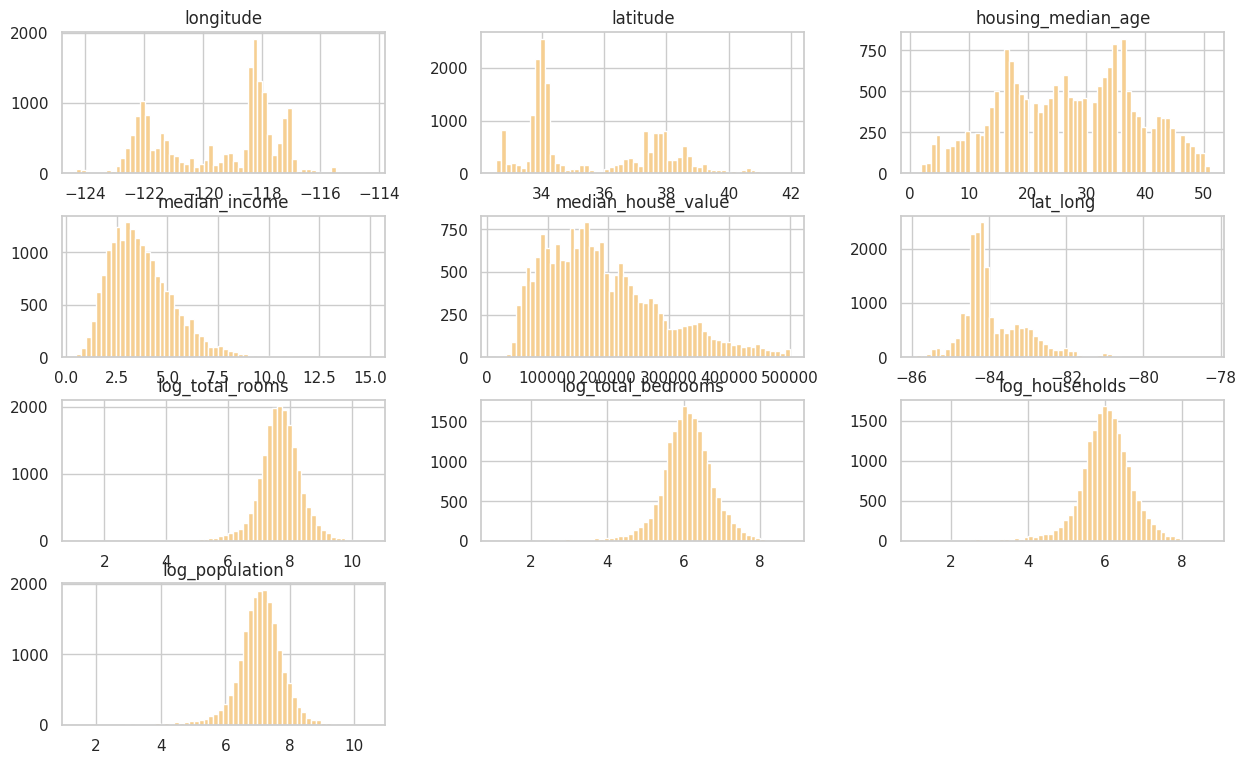

In [ ]:
df.hist(bins=60, figsize=(15,9),color="#f6cf92")
plt.show()

Standardising the data

In [ ]:
df_excluded = df[['ocean_proximity', 'median_house_value']]                                                 # Save categorical column
df_to_standardize = df.drop(columns=df_excluded.columns)                                                    # Select only the columns to be standardized
scaler = StandardScaler()                                                                                   # Initialize the StandardScaler
df = pd.DataFrame(scaler.fit_transform(df_to_standardize), columns=df_to_standardize.columns)  # Standardize the data
df[df_excluded.columns] = df_excluded.values                                                 # Add the excluded column back to the DataFrame

In [ ]:
df.head()

,longitude,latitude,housing_median_age,median_income,lat_long,log_total_rooms,log_total_bedrooms,log_households,log_population,ocean_proximity,median_house_value
0,-1.385831,1.064775,1.226098,2.950274,-0.553619,-1.168383,-1.690813,-1.618386,-1.763699,NEAR BAY,452600.0
1,-1.380783,1.055463,-0.523452,2.935115,-0.565699,1.657148,1.305436,1.439145,0.995374,NEAR BAY,358500.0
2,-1.400977,1.046150,1.313576,-1.027299,-0.638178,0.273825,0.594633,0.536451,0.049057,NEAR BAY,226700.0
3,-1.400977,1.050807,2.013396,-0.998891,-0.626098,-0.842177,-0.597664,-0.593212,-0.704067,NEAR BAY,140000.0
4,-1.400977,1.046150,2.013396,-1.084178,-0.638178,0.095140,0.064737,0.048652,-0.222089,NEAR BAY,158700.0


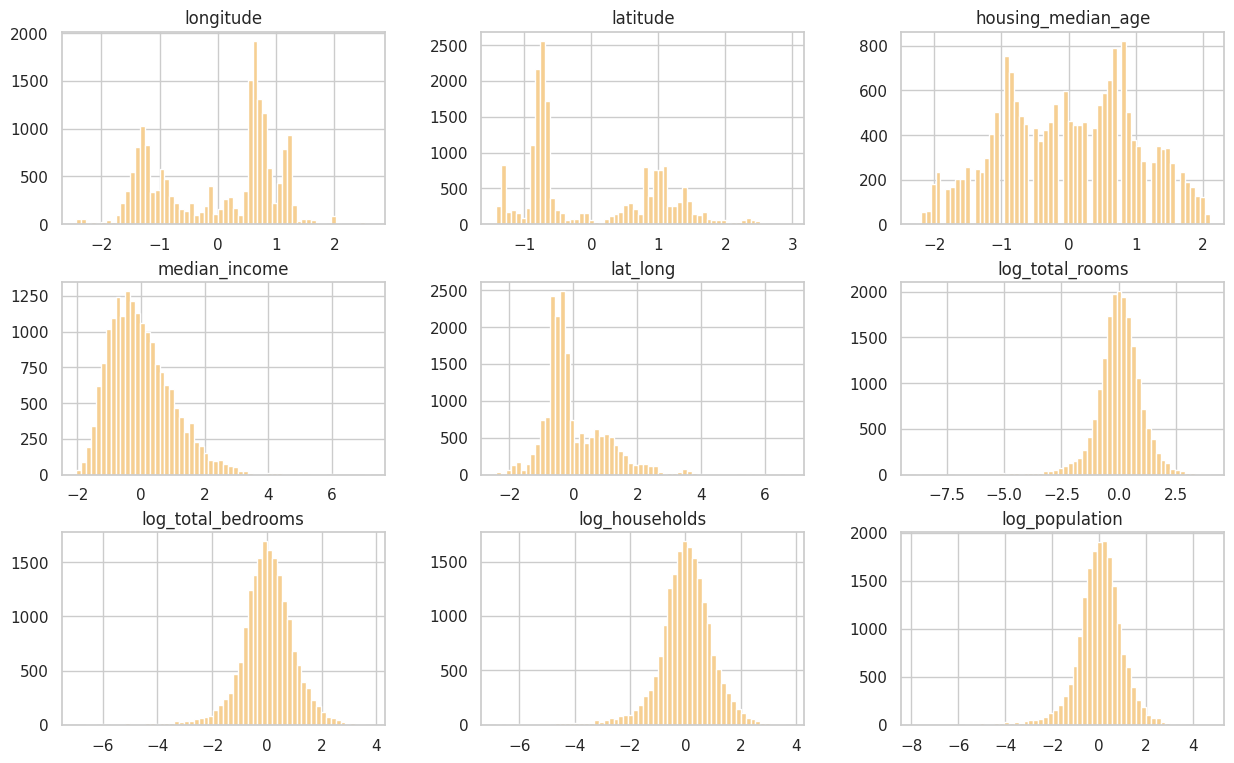

In [ ]:
df.hist(bins=60, figsize=(15,9),color="#f6cf92")
plt.show()

The data contains one categorical variable "ocean_proximity" which we'll convert to numerical for the Gaussian Process.

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

"Ocean proximity" categories have no inherent order to it, so we will convert them using one-hot encoding instead of ordinal ordering.

In [ ]:
df  = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,median_income,lat_long,log_total_rooms,log_total_bedrooms,log_households,log_population,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.385831,1.064775,1.226098,2.950274,-0.553619,-1.168383,-1.690813,-1.618386,-1.763699,452600.0,0,0,0,1,0
1,-1.380783,1.055463,-0.523452,2.935115,-0.565699,1.657148,1.305436,1.439145,0.995374,358500.0,0,0,0,1,0
2,-1.400977,1.046150,1.313576,-1.027299,-0.638178,0.273825,0.594633,0.536451,0.049057,226700.0,0,0,0,1,0
3,-1.400977,1.050807,2.013396,-0.998891,-0.626098,-0.842177,-0.597664,-0.593212,-0.704067,140000.0,0,0,0,1,0
4,-1.400977,1.046150,2.013396,-1.084178,-0.638178,0.095140,0.064737,0.048652,-0.222089,158700.0,0,0,0,1,0


<div style="background-color: #f6a192; color: white; padding: 20px 20px 20px 20px; border-radius: 15px; font-size: 16px; border: 2px solid #f6a192;">
    <h2>5 | Model Fitting</h2>
    <h5>- Gaussian Process, Variable Selection </h5>
</div>

All variables

In [ ]:
gaussian_process_cross_validation(df, 'median_house_value', 'Matern', sample_fraction=0.2)

RMSE Scores: [53077.6712335  78668.43903438 93413.85632017 61523.06943871
 64543.09319912]
Mean: 70245.22584517441
Std: 14220.064830756344


Removing "longitude" and "latitude" as they are now represented by "lat_long".

In [ ]:
gaussian_process_cross_validation(df.drop(columns=["longitude", "latitude"]), 'median_house_value', 'Matern', sample_fraction=0.2)

RMSE Scores: [56051.76442497 81642.46721118 99048.00389859 67593.56916918
 67057.89175157]
Mean: 74278.7392910986
Std: 14810.777897164206
